In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
#explore the tables to understand what columns exits


# Exploratory Precipitation Analysis

In [16]:
#understand what columns are in both tables
row = session.query(measurement).first()
row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x141c433ca90>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [14]:
#understand the columns for the second table
second_row = session.query(station).first()
second_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x141c433ca90>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", date)

Query Date:  2016-08-23


In [75]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date).all()
for row in precip_data:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-06-11', 0.7)
('2017-06-12', 0.81)
('2017-06-13', 0.65)
('2017-06-14', 0.81)
('2017-06-15', 1.69)
('2017-06-16', 0.1)
('2017-06-17', 0.1)
('2017-06-18', 0.7)
('2017-06-19', 0.4)
('2017-06-20', 0.31)
('2017-06-21', 0.3)
('2017-06-22', 0.28)
('2017-06-23', 0.5)
('2017-06-24', 0.22)
('2017-06-25', 0.5)
('2017-06-26', 0.02)
('2017-06-27', 0.1)
('2017-06-28', 0.02)
('2017-06-29', 0.04)
('2017-06-30', 0.2)
('2017-07-01', 0.1)
('2017-07-02', 0.5)
('2017-07-03', 0.4)
('2017-07-04', 0.0)
('2017-07-05', 0.0)
('2017-07-06', 0.02)
('2017-07-07', 0.3)
('2017-07-08', 0.02)
('2017-07-09', 0.0)
('2017-07-10', 0.02)
('2017-07-11', 0.0)
('2017-07-12', 0.05)
('2017-07-13', 0.68)
('2017-07-14', 0.68)
('2017-07-15', 0.1)
('2017-07-16', 0.5)
('2017-07-17', 0.39)
('2017-07-18', 2.4)
('2017-07-19', 0.27)
('2017-07-20', 0.7)
('2017-07-21', 0.1)
('2017-07-22', 4.0)
('2017-07-23', 0.8)
('2017-07-24', 0.84)
('2017-07-25', 0.3)
('2017-07-26', 0.3)
('2017-07-27', 0.0)
('2017-07-28', 0.4)
('2017-07-29', 0.3)
(

In [76]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns = ['date', "prcp"])
precip_df.set_index("date", inplace=True)
precip_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [77]:
# Sort the dataframe by date
precip_df = precip_df.sort_values('date')
precip_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


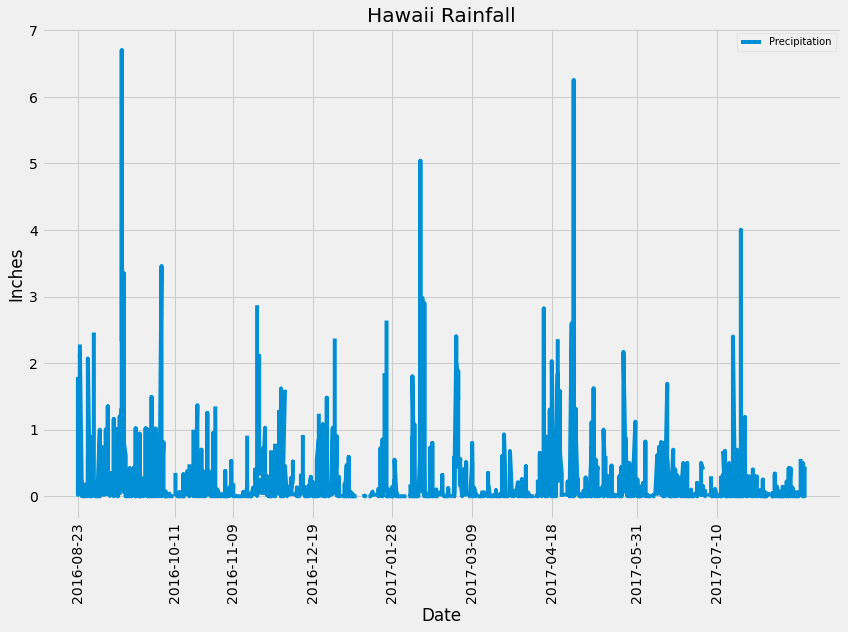

In [80]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,9))
plt.plot(precip_df.index, precip_df['prcp'])

xloc = ['2016-08-23', '2016-10-11', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10']
# rain_plot = precip_df.plot(rot = 45, figsize=(9,6), title = "Hawaii Rainfall")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title("Hawaii Rainfall")
plt.xticks(xloc, rotation="vertical")
plt.legend(["Precipitation"], fontsize=10)

plt.tight_layout()
plt.savefig("Images/Precip_Plot.png")
plt.show()

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
session.query(station).group_by(station.station).count()

9

In [97]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# isolate the highest id
active_station = session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).first()
most_active = active_station[0]
most_active

'USC00519281'

In [103]:
#calcuclate the the lowest, highest, and average temperature based on the id
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==most_active).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs).filter(measurement.station==most_active).filter(measurement.date>=date).all()
data

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


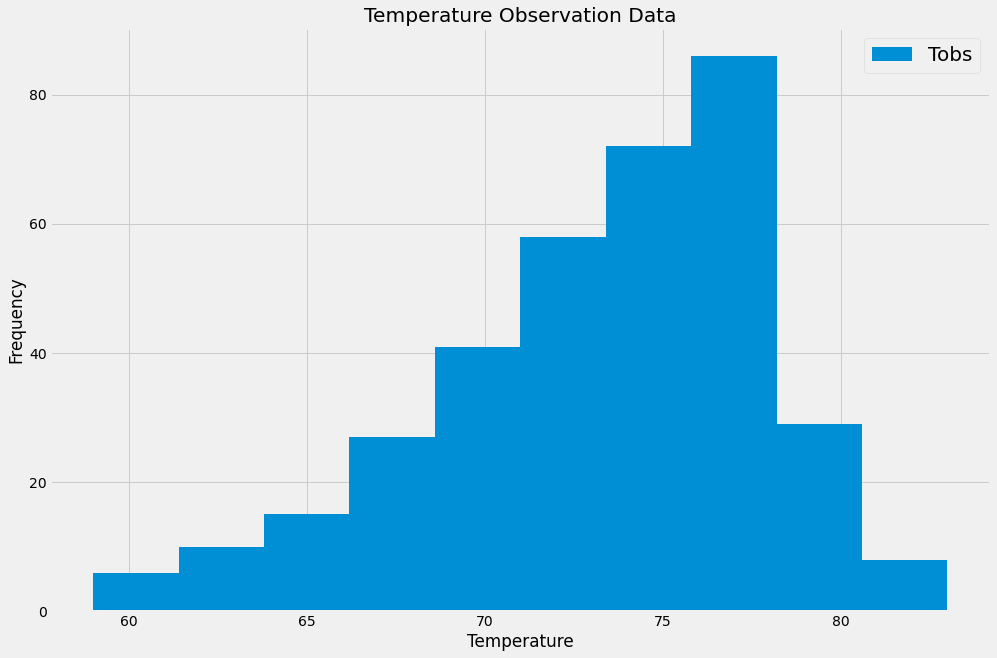

In [111]:
plt.figure(figsize=(15,10))
plt.hist(np.ravel(data))
plt.title("Temperature Observation Data")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"], fontsize = 20)

plt.savefig("Images/TOBS_Histogram.png")
plt.tight_layout
plt.show()

# Close session

In [112]:
# Close Session
session.close()